# Example 2
### Linear Regression
Here input and target values are defined. The model requires a minimum input dim of 2.

In [1]:
import compyute as cp

In [2]:
X = cp.tensor([-1, 0, 1, 2, 3, 4])
X = X[:, None]  # input must be dim 2

y = cp.tensor([-3, -1, 1, 3, 5, 7])
y = y[:, None]  # output must be dim 2

The model is defined using one linear layer with one input (`in_channels=1`) and one output (`out_channels=1`).
The goal of the model is to learn a linear function that best resembles the input data. A linear function in one imput dimension is given by $ y = a \cdot x + b $.<br>
Internally, $a$ is represented by a *weight* value and $ b $ by a *bias* value, both of which shall be learned by the model during the training process.

In [3]:
import compyute.nn as nn

model = nn.Linear(in_channels=1, out_channels=1)

To train and evaluate evaluate the model a loss function (here the mean squared error) is used. After computing the loss and gradients, an optimizer is used to update the model parameters in order to  improve the next prediction.

In [4]:
from compyute.nn.trainer import Trainer

trainer = Trainer(model=model, optimizer="sgd", loss="mean_squared_error", metric="r2")

The model can then be trained iteratively using input and target values.

In [5]:
trainer.train(X, y, epochs=10000, batch_size=len(X))

After training the model, it can be used to make predictions.

In [6]:
sample = cp.tensor([[10]])
prediction = model(sample)
print(f"{prediction.item():.2f}")

19.00


Here is the linear function the model learned

In [7]:
# ! pip install matplotlib

linear function learned:
y = 2.00 * x + -1.00


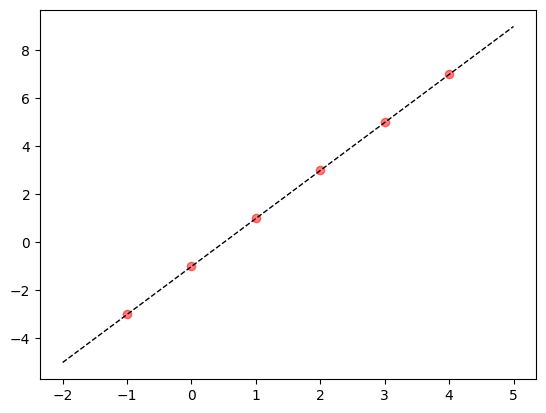

In [8]:
import matplotlib.pyplot as plt

w = model.w.item()
b = model.b.item()
print(f"linear function learned:\ny = {w:.2f} * x + {b:.2f}")

x_sample = cp.arange(6, -2)[:, None]
y_sample = model(x_sample)

plt.plot(x_sample, y_sample, c="k", linestyle="dashed", linewidth=1)
plt.scatter(X, y, c="r", alpha=0.5)  # training data

Models can also be saved

In [9]:
nn.save_module(model, "linear_regression_model.cp")

... and loaded

In [10]:
import compyute.nn as nn

loaded_model = nn.load_module("linear_regression_model.cp")

In [11]:
import compyute as cp

sample = cp.tensor([[9]])
prediction = loaded_model(sample).item()
print(f"{prediction:.2f}")

17.00
